# **Diwali Sales Analysis**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading The Dataset**

In [6]:
# Load the dataset
file_path = r'C:\Users\abdul jaleel\Documents\SalesData\Diwali Sales Data.csv'
df=pd.read_csv(file_path, encoding= 'unicode_escape')

In [8]:
df.shape

(11251, 15)

In [11]:
# Display the first few rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# **Data Cleaning**

In [13]:
# Drop unnecessary columns
df.drop(['unnamed1', 'Status'], axis=1, inplace=True)

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [16]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [21]:
# Handle missing values
df.ffill(inplace=True)

In [23]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


In [31]:
# Ensure numerical columns are correctly typed
df['Amount'] = df['Amount'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Amount            11251 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [34]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(11243, 13)

# **Exploratory Data Analysis (EDA)**

## **Demographics Insights**

### *Gender Distribution*

<Figure size 700x500 with 0 Axes>

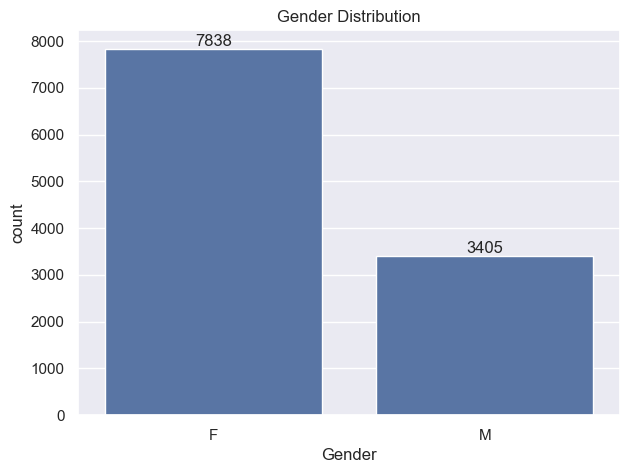

<Figure size 700x500 with 0 Axes>

In [135]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender Distribution')
plt.figure(figsize=(7,5))

<Figure size 700x500 with 0 Axes>

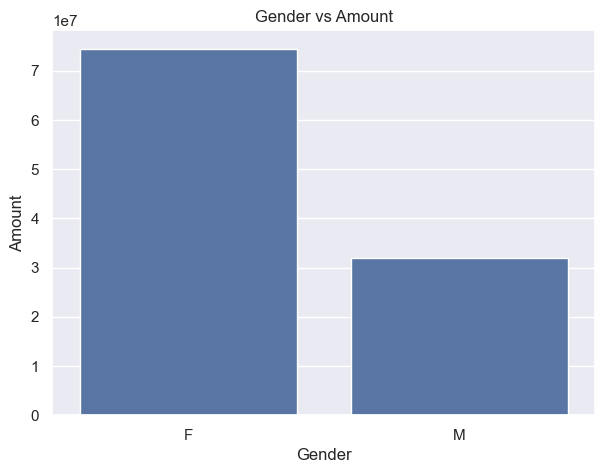

<Figure size 700x500 with 0 Axes>

In [136]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.title('Gender vs Amount')
plt.figure(figsize=(7,5))

### Insight:
Gender distribution shows most of the buyers are **Female** and even the purchasing power of females are greater than men.

### *Age Group Distribution*

Text(0.5, 1.0, 'Age Group Distribution')

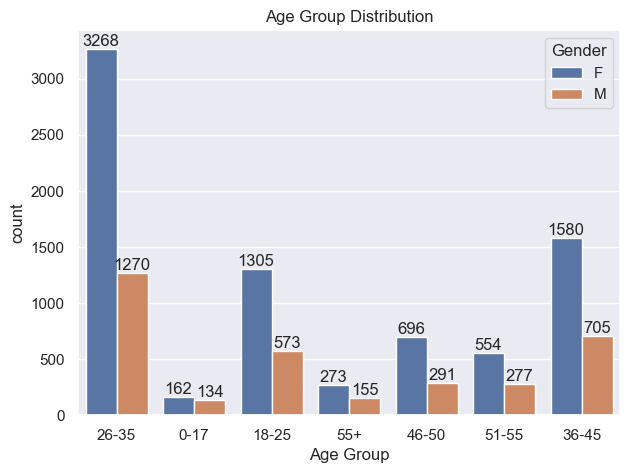

In [141]:
# Age Group Distribution
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Age Group Distribution')

Text(0.5, 1.0, 'Age Group vs Amount')

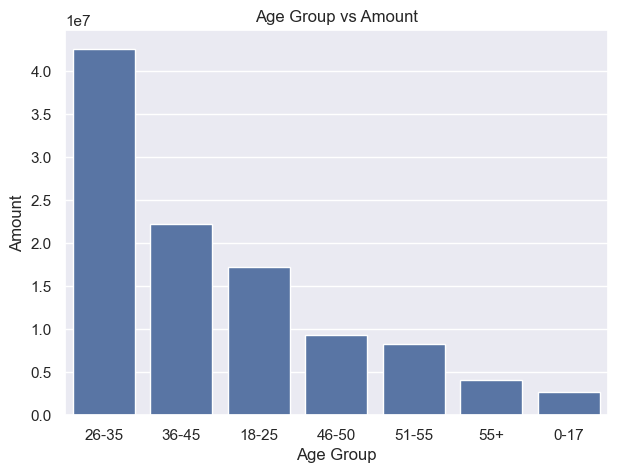

In [142]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.title('Age Group vs Amount')

## Insight:
The majority of the customers belong to the **26 to 35 Years** age group.

### *Marital Status Distribution*

([<matplotlib.axis.XTick at 0x2244815c1a0>,
 [Text(0, 0, 'Single'), Text(1, 0, 'Married')])

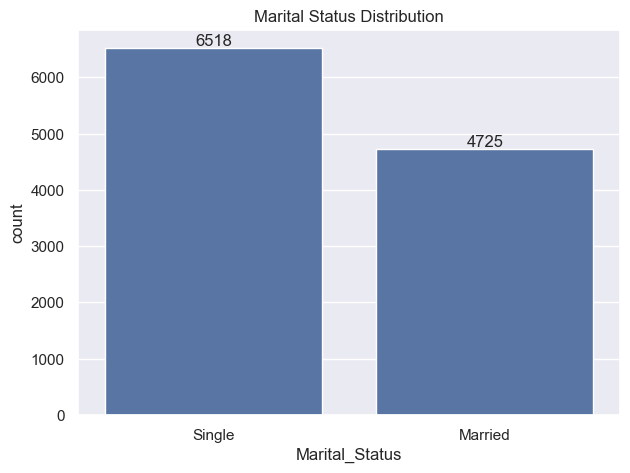

In [143]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital Status Distribution')
plt.xticks([0, 1], ['Single', 'Married'])

Text(0.5, 1.0, 'Amount vs Marital Status')

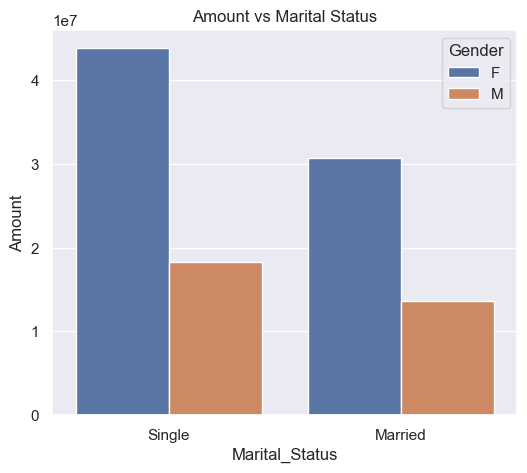

In [144]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.xticks([0, 1], ['Single', 'Married'])
plt.title('Amount vs Marital Status')

### Insight:
Most customers are **Single - Woman** and they have high purchasing power.

### *Occupation Distribution*

Text(0.5, 1.0, 'Occupation Wise Sales')

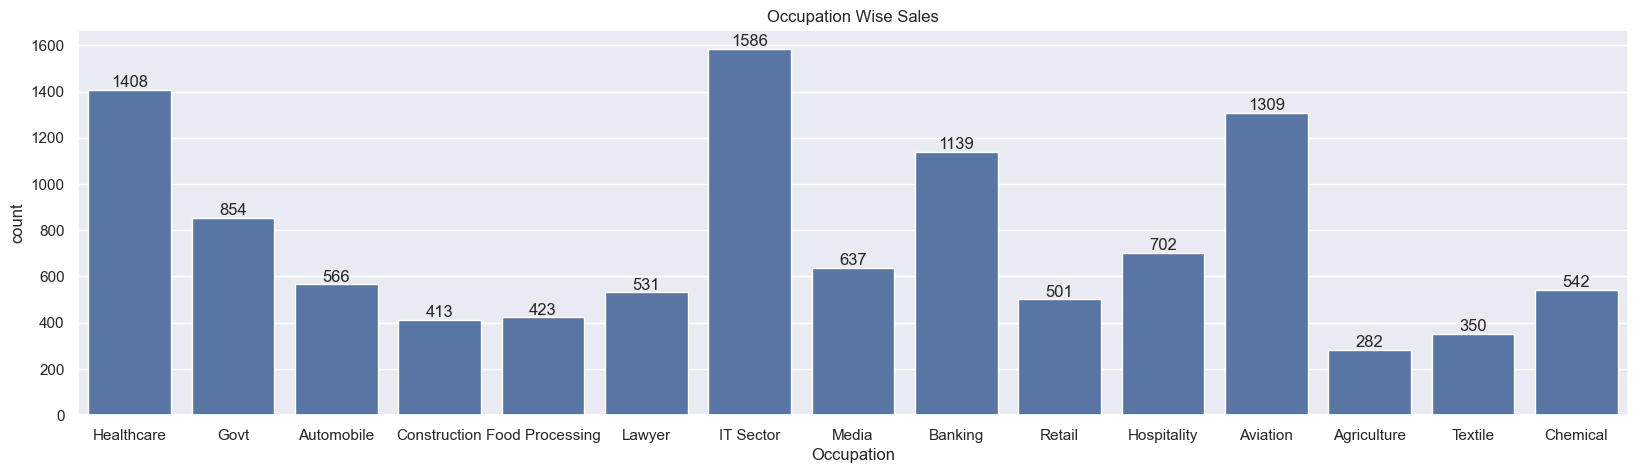

In [145]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Occupation Wise Sales')

### Insight:
Most buyers are from **IT Sector, Healthcare and Aviation** sectors.

## **Purchasing Patterns**

### *Total Sales by State*

### *State Distribution*

Text(0.5, 1.0, 'Top 10 States - by Number of Orders')

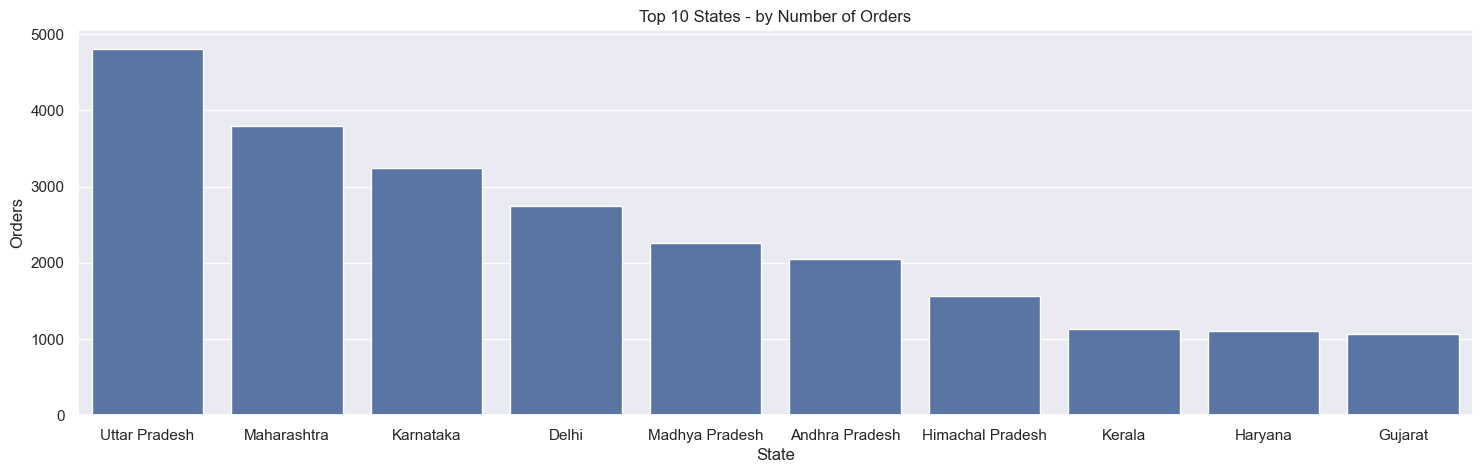

In [146]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.title('Top 10 States - by Number of Orders')

Text(0.5, 1.0, 'Top 10 States - by Total Amount of Sales')

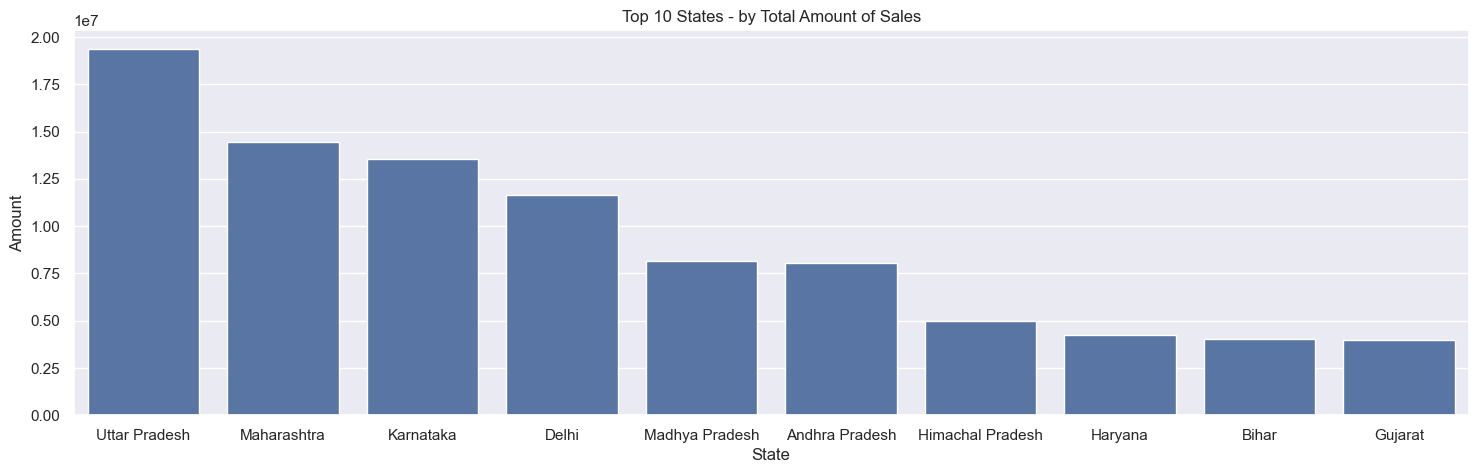

In [147]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.title('Top 10 States - by Total Amount of Sales')

### Insight:
Most of the orders and Total sales amount are from **Uttar Pradesh, Maharashtra and Karnataka** respectively.

### *Product Categories*

Text(0, 0.5, 'Number of Purchases')

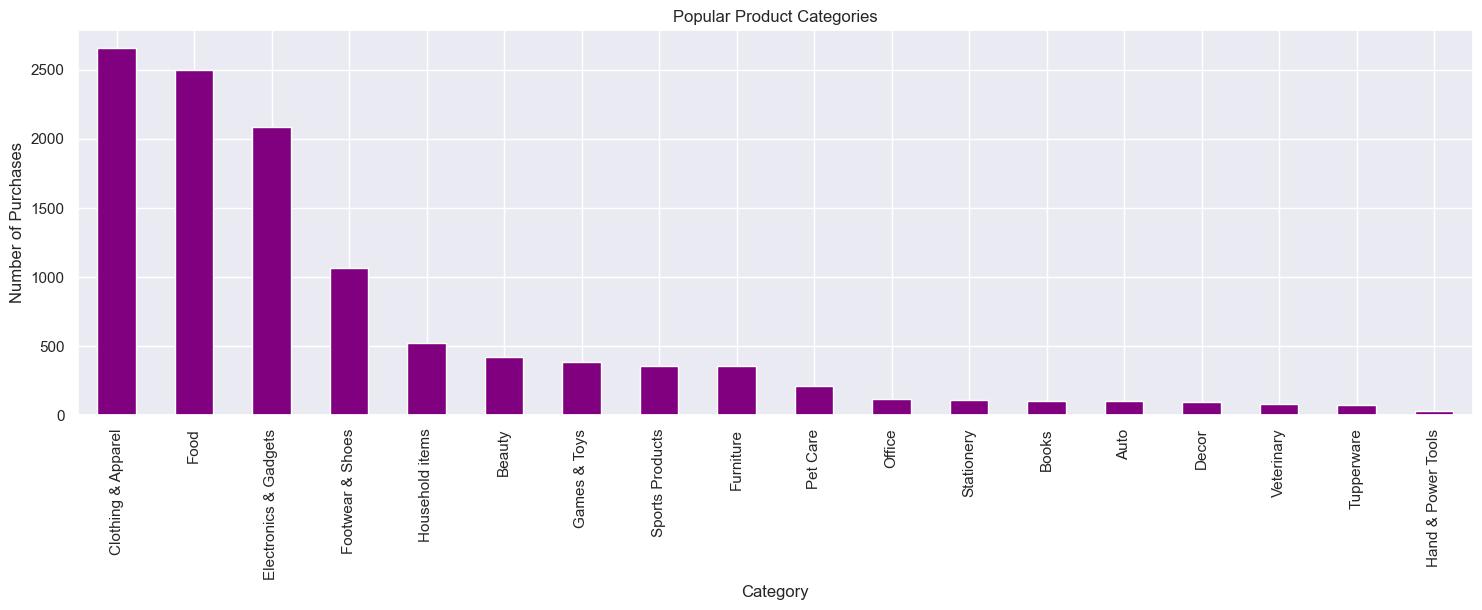

In [148]:
product_categories = df['Product_Category'].value_counts()
product_categories.plot(kind='bar', color='purple')
plt.title('Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')

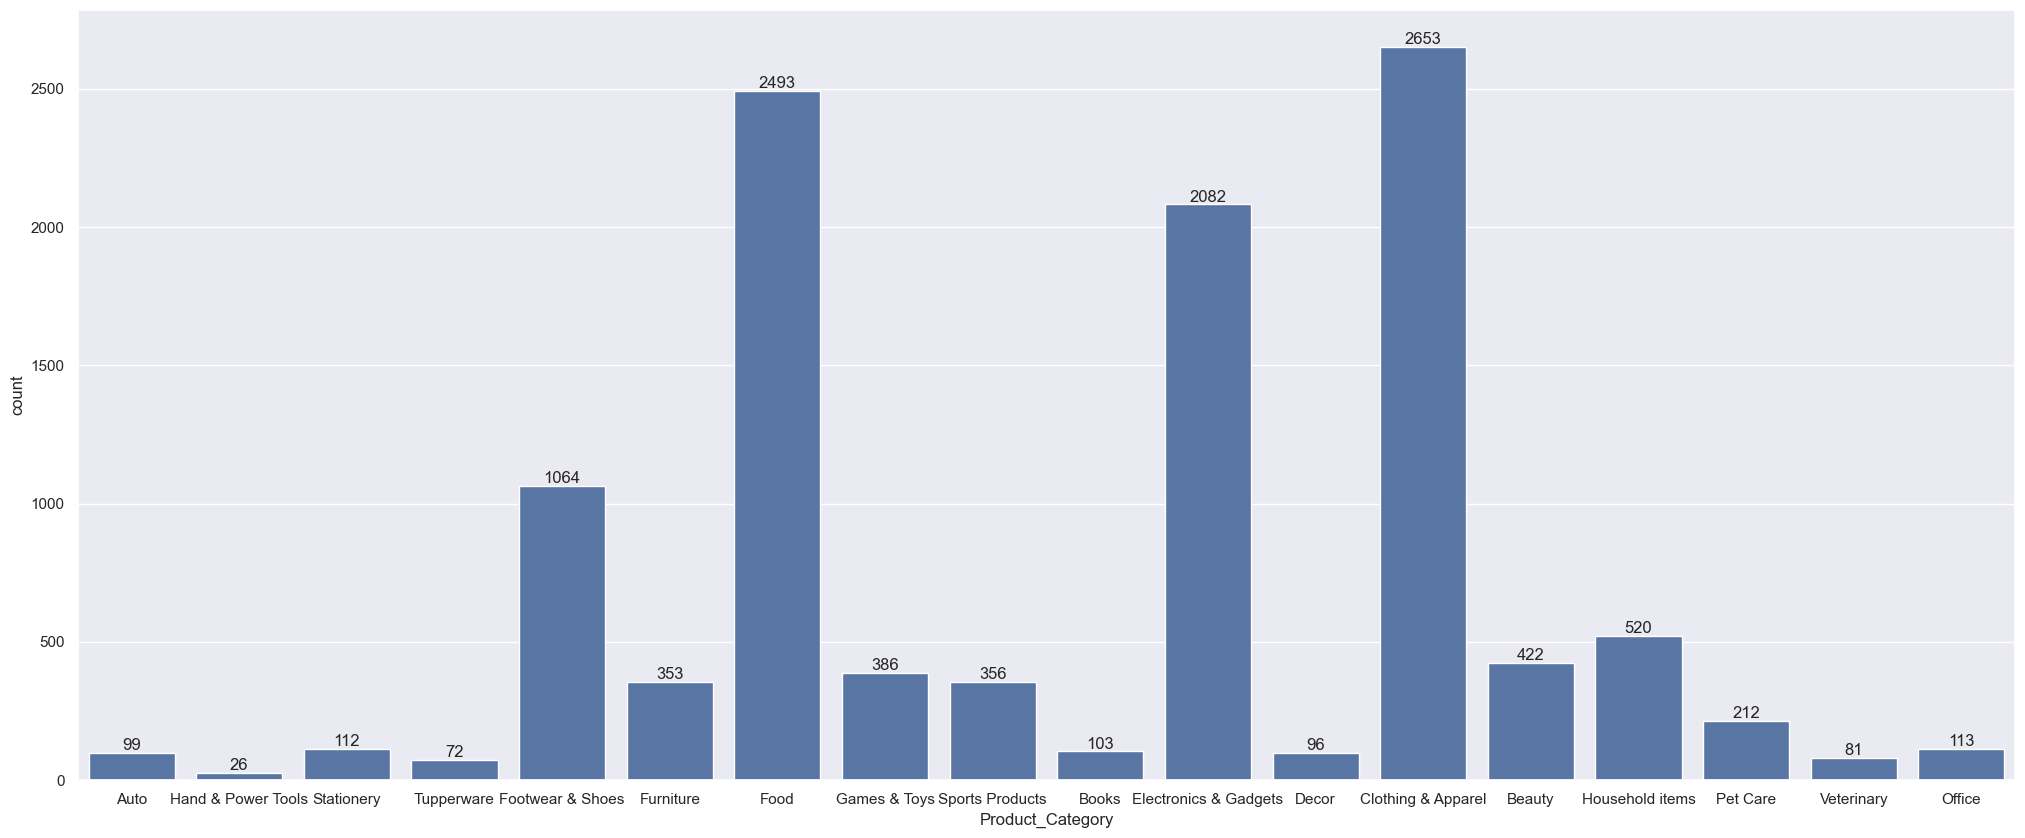

In [149]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

## Insight:
**Clothing & Apparel and Food** is the most popular product category, suggesting high demand during Diwali.

## **Features**

### *Average Order Value*

In [150]:
df['Avg_Order_Value'] = df['Amount'] / df['Orders']
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Avg_Order_Value
count,1.124300e+04,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000
mean,1.003005e+06,35.422841,0.420261,2.488749,9466.548786,4966.458011
std,1.716141e+03,12.756369,0.493623,1.114960,5233.102210,4216.959832
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,53.250000
25%,1.001494e+06,27.000000,0.000000,1.000000,5444.000000,2024.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8111.000000,3827.250000
75%,1.004430e+06,43.000000,1.000000,3.000000,12693.500000,6424.666667
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,23952.000000


## Insight:
Customers with a high average order value can be targeted for premium offers.

### *Sales by Zone*

Text(0.5, 1.0, 'Sales by Zone')

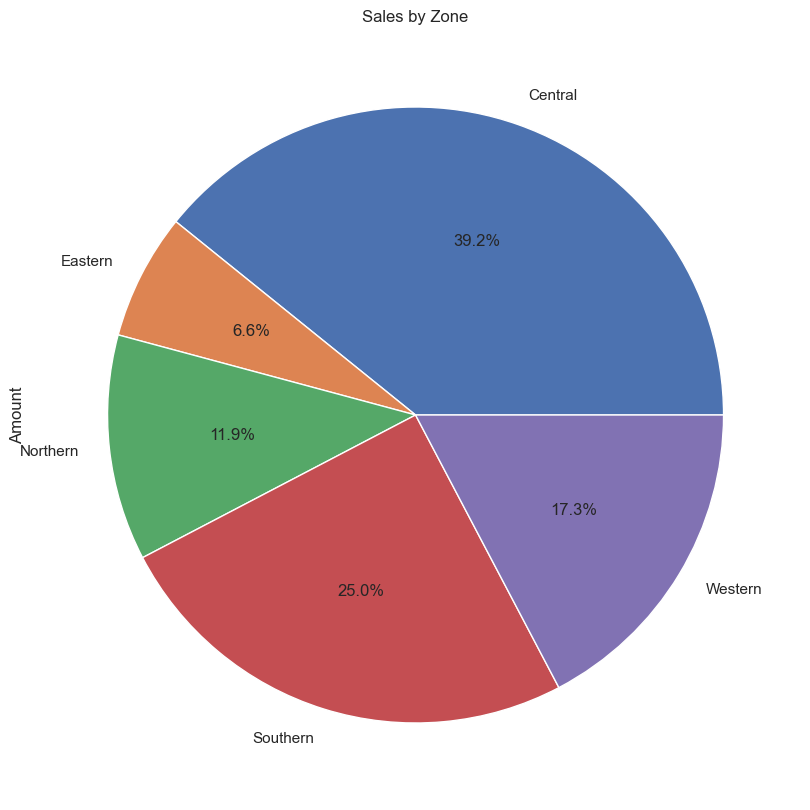

In [151]:
zone_sales = df.groupby('Zone')['Amount'].sum()
zone_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Zone')

## Insight:
The **Central zone** contributed the highest sales, indicating regional preferences.

### *Top 10 Customers by Spending*

In [152]:
top_customers = df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Cust_name
Vishakha     382782
Sudevi       287142
Vasudev      281034
Neola        275234
Alejandro    272517
Aastha       266961
Shreyshi     265603
Hazel        242343
Akshat       241349
Gopal        239147
Name: Amount, dtype: int64


## Insight:
The top customer **Vishakha** spent the most, suggesting a high-value customer segment.

## Conclusion:
Single women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.